In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import all datasets

SHC_1980_1984_df = pd.read_csv('data/SHC_1980_1984.csv')
SHC_1985_1989_df = pd.read_csv('data/SHC_1985_1989.csv')
SHC_1990_1994_df = pd.read_csv('data/SHC_1990_1994.csv')
SHC_1995_1999_df = pd.read_csv('data/SHC_1995_1999.csv')
SHC_2000_2004_df = pd.read_csv('data/SHC_2000_2004.csv')
SHC_2005_2009_df = pd.read_csv('data/SHC_2005_2009.csv')
SHC_2010_2014_df = pd.read_csv('data/SHC_2010_2014.csv')
SHC_2015_2019_df = pd.read_csv('data/SHC_2015_2019.csv')


In [3]:
#SHC_1980_1984_df.head(5)
SHC_2015_2019_df.head(5)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2017,2017,2017,4,0,1,Import,8,Albania,...,9948044,NaN,NaN,NaN,9948044.0,NaN,10405997,NaN,NaN,0
1,H5,2017,2017,2017,4,0,2,Export,8,Albania,...,29067,NaN,NaN,NaN,29067.0,NaN,9197,NaN,NaN,0
2,H5,2017,2017,2017,4,0,1,Import,12,Algeria,...,538,NaN,NaN,NaN,538.0,NaN,5038,NaN,NaN,0
3,H5,2017,2017,2017,4,0,1,Import,20,Andorra,...,391415,NaN,NaN,NaN,391415.0,NaN,843352,NaN,NaN,0
4,H5,2017,2017,2017,4,0,2,Export,20,Andorra,...,338211,NaN,NaN,NaN,338211.0,NaN,555746,NaN,NaN,0


In [4]:
print(SHC_1980_1984_df.columns)
print(SHC_2015_2019_df.columns)

Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Transport Code',
       'Mode of Transport', 'Commodity Code', 'Commodity', 'Qty Unit Code',
       'Qty Unit', 'Qty', 'Alt Qty Unit Code', 'Alt Qty Unit', 'Alt Qty',
       'Netweight (kg)', 'Gross weight (kg)', 'Trade Value (US$)',
       'CIF Trade Value (US$)', 'FOB Trade Value (US$)', 'Flag'],
      dtype='object')
Index(['Classification', 'Year', 'Period', 'Period Desc.', 'Aggregate Level',
       'Is Leaf Code', 'Trade Flow Code', 'Trade Flow', 'Reporter Code',
       'Reporter', 'Reporter ISO', 'Partner Code', 'Partner', 'Partner ISO',
       '2nd Partner Code', '2nd Partner', '2nd Partner ISO',
       'Customs Proc. Code', 'Customs', 'Mode of Tr

## get rid of all the useless columns

In [5]:
def prep_SHC_df(df, netweight=True, CIF=False):
    df_ = pd.DataFrame()
    df_['Year'] = df['Year']
    df_['Trade Flow'] = df['Trade Flow']
    df_['Reporter'] = df['Reporter']
    df_['Partner'] = df['Partner']
    df_['Commodity'] = df['Commodity']
    if netweight:
        df_['Weight (kg)'] = df['Netweight (kg)']
    else:
        df_['Weight (kg)'] = df['Gross weight (kg)']
        
    if CIF:
        df_['Trade Value (US$)'] = df['CIF Trade Value (US$)']
    else:
        df_['Trade Value (US$)'] = df['Trade Value (US$)']
    
    return(df_)

In [6]:
SHC_1985_1989_small_df = prep_SHC_df(SHC_1985_1989_df, netweight=True, CIF=False)
SHC_1990_1994_small_df = prep_SHC_df(SHC_1990_1994_df, netweight=True, CIF=False)
SHC_1995_1999_small_df = prep_SHC_df(SHC_1995_1999_df, netweight=True, CIF=False)
SHC_2000_2004_small_df = prep_SHC_df(SHC_2000_2004_df, netweight=True, CIF=False)
SHC_2005_2009_small_df = prep_SHC_df(SHC_2005_2009_df, netweight=True, CIF=False)
SHC_2010_2014_small_df = prep_SHC_df(SHC_2010_2014_df, netweight=True, CIF=False)
SHC_2015_2019_small_df = prep_SHC_df(SHC_2015_2019_df, netweight=True, CIF=False)

In [7]:
# for some reason it doesn't matter if you differentiate between the different types ...

#SHC_1985_1989_small_df.head(5)
#SHC_1990_1994_small_df.head(5)
#SHC_1995_1999_small_df.head(5)
#SHC_2000_2004_small_df.head(5)
#SHC_2005_2009_small_df.head(5)
#SHC_2010_2014_small_df.head(5)
SHC_2015_2019_small_df.head(5)

,Year,Trade Flow,Reporter,Partner,Commodity,Weight (kg),Trade Value (US$)
0,2017,Import,Albania,World,Textiles; worn clothing and other worn articles,9948044.0,10405997
1,2017,Export,Albania,World,Textiles; worn clothing and other worn articles,29067.0,9197
2,2017,Import,Algeria,World,Textiles; worn clothing and other worn articles,538.0,5038
3,2017,Import,Andorra,World,Textiles; worn clothing and other worn articles,391415.0,843352
4,2017,Export,Andorra,World,Textiles; worn clothing and other worn articles,338211.0,555746


In [8]:
# append all DataFrames to one 

SHC_small_df = pd.concat([SHC_1985_1989_small_df, SHC_1990_1994_small_df, SHC_1995_1999_small_df, 
                          SHC_2000_2004_small_df, SHC_2005_2009_small_df, SHC_2010_2014_small_df,
                          SHC_2015_2019_small_df])

# Mozambique 2017 has to be a mistake in the data
SHC_small_df.at[975, 'Weight (kg)'] = 0

SHC_small_df.sort_values(['Year'])

,Year,Trade Flow,Reporter,Partner,Commodity,Weight (kg),Trade Value (US$)
0,1988,Import,Australia,World,Worn clothing and other worn articles,0.0,898351
20,1988,Import,Thailand,World,Worn clothing and other worn articles,270351.0,1182573
19,1988,Export,Switzerland,World,Worn clothing and other worn articles,2021673.0,1509871
18,1988,Import,Switzerland,World,Worn clothing and other worn articles,726745.0,486941
17,1988,Export,India,World,Worn clothing and other worn articles,1678.0,13304
...,...,...,...,...,...,...,...
461,2019,Export,Iceland,World,Textiles; worn clothing and other worn articles,1811301.0,641679
462,2019,Import,Indonesia,World,Textiles; worn clothing and other worn articles,4218761.0,6075437
463,2019,Export,Indonesia,World,Textiles; worn clothing and other worn articles,1563931.0,1753793
465,2019,Export,Ireland,World,Textiles; worn clothing and other worn articles,12008474.0,10040969


In [9]:
# group by year and trade flow

SHC_small_grouped_df = SHC_small_df.groupby(['Year', 'Trade Flow'], as_index=False).sum()
SHC_small_grouped_df

,Year,Trade Flow,Weight (kg),Trade Value (US$)
0,1988,Export,1.432056e+08,91027262
1,1988,Import,8.736052e+06,13669223
2,1989,Export,1.879825e+08,126681439
3,1989,Import,5.449574e+07,73905400
4,1990,Export,2.070919e+08,157102605
...,...,...,...,...
59,2017,Import,3.524668e+09,3411250963
60,2018,Export,3.549123e+09,4407491195
61,2018,Import,4.101217e+09,3416360644
62,2019,Export,2.855532e+09,3891636500


In [10]:
SHC_small_grouped_export_df = SHC_small_grouped_df[SHC_small_grouped_df['Trade Flow'] == 'Export']
SHC_small_grouped_import_df = SHC_small_grouped_df[SHC_small_grouped_df['Trade Flow'] == 'Import']

years = SHC_small_grouped_export_df['Year']

# Do some plotting

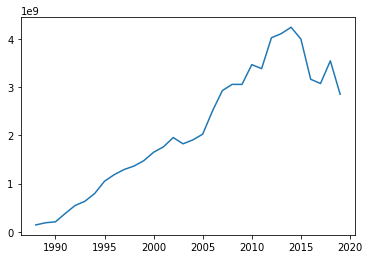

In [11]:
plt.plot(years, SHC_small_grouped_export_df['Weight (kg)'])

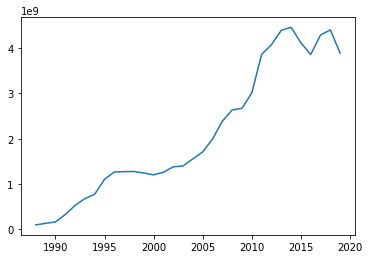

In [12]:
plt.plot(years, SHC_small_grouped_export_df['Trade Value (US$)'])

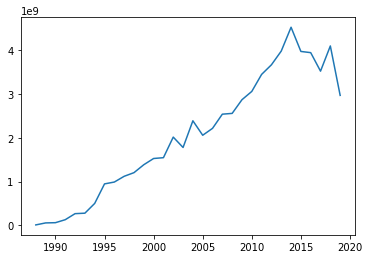

In [13]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)

#SHC_small_df[(SHC_small_df['Year'] == 2017) & (SHC_small_df['Trade Flow'] == 'Import')]

plt.plot(years, SHC_small_grouped_import_df['Weight (kg)']);

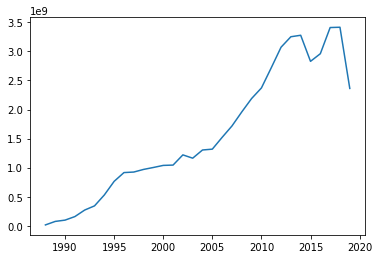

In [14]:
plt.plot(years, SHC_small_grouped_import_df['Trade Value (US$)'])

## look at proportion that Africa had as importer and West as exporter over that time

In [15]:
#print(SHC_small_df['Reporter'].unique())

#we use africa as subsaharan africa here.
african_countries = ['Madagascar', 'Malawi','Kenya', 'So. African Customs Union', 'Burundi', 'Central African Rep.', 
                    'Gabon', 'Congo', 'Mozambique', 'Togo', 'Uganda', 'Gambia', 'Senegal', 'United Rep. of Tanzania',
                    'Zambia', 'Benin', 'Guinea', 'Mali', 'Niger', 'Nigeria', 'Fmr Sudan', 'Cameroon', 'Chad', 
                    'Ethiopia', "Côte d'Ivoire", 'Zimbabwe', 'Burkina Faso', 'Ghana',  'Rwanda', 
                    'South Africa', 'Namibia', 'Botswana', 'Eswatini', 'Dominican Rep.', 'Lesotho', 'Sierra Leone',                      
                    'Angola', 'Djibouti', 'Sudan']

western_countries = ['Australia', 'Finland', 'Fmr Fed. Rep. of Germany', 'Greece', 'Iceland',
                     'Portugal', 'Switzerland' , 'Canada', 'Denmark', 'New Zealand', 'Spain', 
                     'Germany', 'USA', 'Croatia', 'Hungary', 'Ireland', 'Rep. of Korea', 'Japan',
                     'Netherlands', 'Sweden', 'Czechia', 'Norway', 'United Kingdom', 'Austria',
                     'France', 'Italy', 'Poland', 'Belgium-Luxembourg', 'Bulgaria', 'Estonia',
                     'Israel', 'Belgium', 'Luxembourg', 'Bosnia Herzegovina', 'Serbia']

SHC_small_df['Region'] = np.where(SHC_small_df['Reporter'].isin(african_countries), 'Africa', 'Rest')
SHC_small_df['Region'] = np.where(SHC_small_df['Reporter'].isin(western_countries), 'West', SHC_small_df['Region'])
SHC_small_df.head(100)

,Year,Trade Flow,Reporter,Partner,Commodity,Weight (kg),Trade Value (US$),Region
0,1988,Import,Australia,World,Worn clothing and other worn articles,0.0,898351,West
1,1988,Export,Australia,World,Worn clothing and other worn articles,4131518.0,4895774,West
2,1988,Import,Finland,World,Worn clothing and other worn articles,74648.0,116052,West
3,1988,Export,Finland,World,Worn clothing and other worn articles,601528.0,1330385,West
4,1988,Import,Fmr Fed. Rep. of Germany,World,Worn clothing and other worn articles,3771989.0,4832000,West
5,1988,Export,Fmr Fed. Rep. of Germany,World,Worn clothing and other worn articles,97435144.0,55211000,West
6,1988,Import,Greece,World,Worn clothing and other worn articles,325362.0,525104,West
7,1988,Export,Greece,World,Worn clothing and other worn articles,68093.0,73784,West
8,1988,Import,Iceland,World,Worn clothing and other worn articles,2096.0,42138,West
9,1988,Export,Iceland,World,Worn clothing and other worn articles,75148.0,87738,West


In [16]:
# redo the same groupbys but incorporate africa and west

# group by year and trade flow

SHC_small_grouped_africa_df = SHC_small_df.groupby(['Year', 'Trade Flow', 'Region'], as_index=False).sum()

#export
SHC_small_grouped_export_africa_df = SHC_small_grouped_africa_df[(SHC_small_grouped_africa_df['Trade Flow'] == 'Export') &\
                                                                 (SHC_small_grouped_africa_df['Region'] == 'Africa')]
SHC_small_grouped_export_west_df = SHC_small_grouped_africa_df[(SHC_small_grouped_africa_df['Trade Flow'] == 'Export') &\
                                                               (SHC_small_grouped_africa_df['Region'] == 'West')]
SHC_small_grouped_export_rest_df = SHC_small_grouped_africa_df[(SHC_small_grouped_africa_df['Trade Flow'] == 'Export') &\
                                                               (SHC_small_grouped_africa_df['Region'] == 'Rest')]

#import
SHC_small_grouped_import_africa_df = SHC_small_grouped_africa_df[(SHC_small_grouped_africa_df['Trade Flow'] == 'Import') &\
                                                                 (SHC_small_grouped_africa_df['Region'] == 'Africa')]
SHC_small_grouped_import_west_df = SHC_small_grouped_africa_df[(SHC_small_grouped_africa_df['Trade Flow'] == 'Import') &\
                                                               (SHC_small_grouped_africa_df['Region'] == 'West')]
SHC_small_grouped_import_rest_df = SHC_small_grouped_africa_df[(SHC_small_grouped_africa_df['Trade Flow'] == 'Import') &\
                                                               (SHC_small_grouped_africa_df['Region'] == 'Rest')]


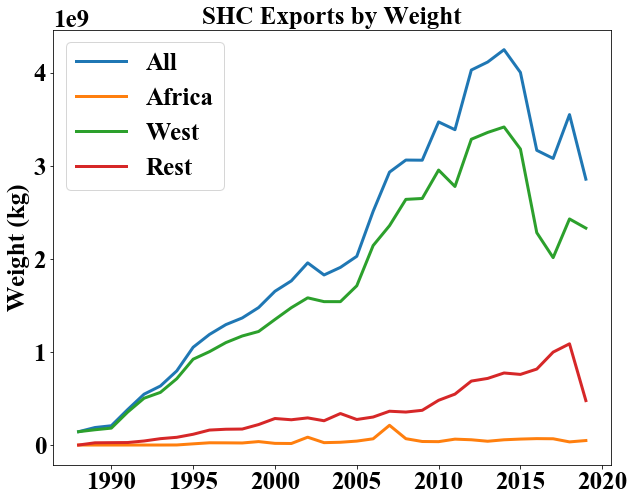

In [17]:
africa_exports = np.append(np.zeros(2), SHC_small_grouped_export_africa_df['Weight (kg)'])

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(10, 8))

legend_size = 25
title_size = 25
label_size = 25
lw_size = 3

plt.plot(years, SHC_small_grouped_export_df['Weight (kg)'], label='All', lw=lw_size)
plt.plot(years, africa_exports, label='Africa', lw=lw_size)
plt.plot(years, SHC_small_grouped_export_west_df['Weight (kg)'], label='West', lw=lw_size)
plt.plot(years, SHC_small_grouped_export_rest_df['Weight (kg)'], label='Rest', lw=lw_size)

plt.title('SHC Exports by Weight', size = title_size)
plt.ylabel('Weight (kg)', size = label_size)

plt.legend(prop={'size': legend_size});
plt.savefig('exports_weight.png')

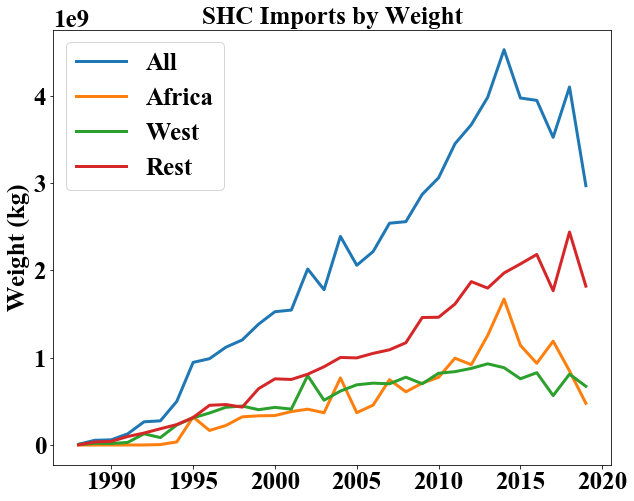

In [18]:
africa_imports = np.append(np.zeros(2), SHC_small_grouped_import_africa_df['Weight (kg)'])

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(10, 8))

legend_size = 25
title_size = 25
label_size = 25
lw_size = 3

plt.plot(years, SHC_small_grouped_import_df['Weight (kg)'], label='All', lw=lw_size)
plt.plot(years, africa_imports, label='Africa', lw=lw_size)
plt.plot(years, SHC_small_grouped_import_west_df['Weight (kg)'], label='West', lw=lw_size)
plt.plot(years, SHC_small_grouped_import_rest_df['Weight (kg)'], label='Rest', lw=lw_size)

plt.title('SHC Imports by Weight', size = title_size)
plt.ylabel('Weight (kg)', size = label_size)

plt.legend(prop={'size': legend_size});
plt.savefig('imports_weight.png')

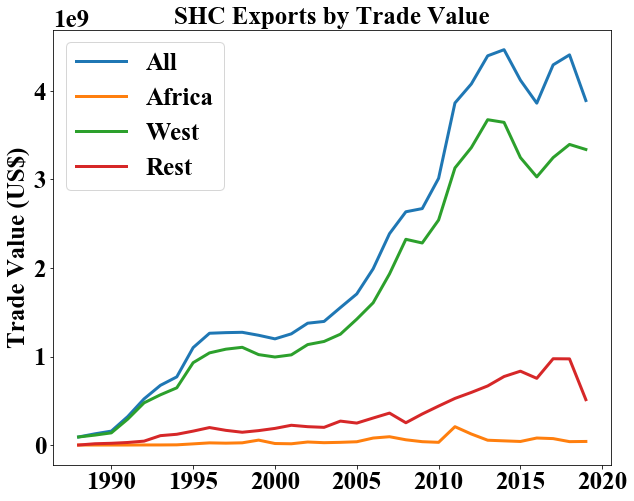

In [19]:
africa_exports = np.append(np.zeros(2), SHC_small_grouped_export_africa_df['Trade Value (US$)'])

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(10, 8))

legend_size = 25
title_size = 25
label_size = 25
lw_size = 3

plt.plot(years, SHC_small_grouped_export_df['Trade Value (US$)'], label='All', lw=lw_size)
plt.plot(years, africa_exports, label='Africa', lw=lw_size)
plt.plot(years, SHC_small_grouped_export_west_df['Trade Value (US$)'], label='West', lw=lw_size)
plt.plot(years, SHC_small_grouped_export_rest_df['Trade Value (US$)'], label='Rest', lw=lw_size)

plt.title('SHC Exports by Trade Value', size = title_size)
plt.ylabel('Trade Value (US$)', size = label_size)

plt.legend(prop={'size': legend_size});
plt.savefig('exports_trade_value.png')

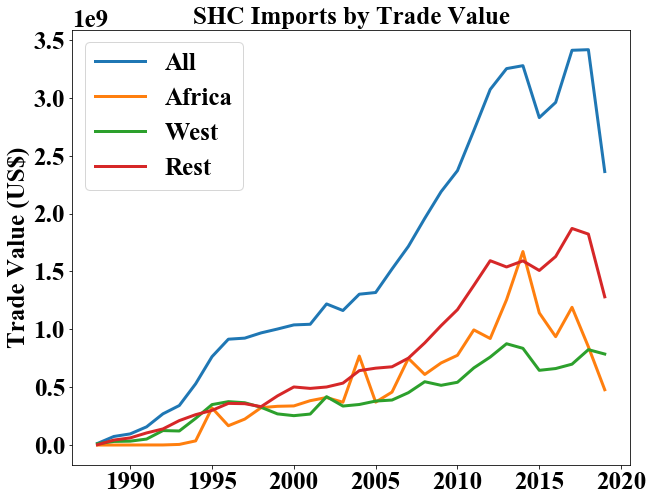

In [20]:
africa_exports = np.append(np.zeros(2), SHC_small_grouped_import_africa_df['Trade Value (US$)'])

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams["font.family"] = "Times New Roman"

plt.figure(figsize=(10, 8))

legend_size = 25
title_size = 25
label_size = 25
lw_size = 3

plt.plot(years, SHC_small_grouped_import_df['Trade Value (US$)'], label='All', lw=lw_size)
plt.plot(years, africa_imports, label='Africa', lw=lw_size)
plt.plot(years, SHC_small_grouped_import_west_df['Trade Value (US$)'], label='West', lw=lw_size)
plt.plot(years, SHC_small_grouped_import_rest_df['Trade Value (US$)'], label='Rest', lw=lw_size)

plt.title('SHC Imports by Trade Value', size = title_size)
plt.ylabel('Trade Value (US$)', size = label_size)

plt.legend(prop={'size': legend_size});
plt.savefig('imports_trade_value.png')

## look at snapshot of 2019 with largest importers and exporters

In [21]:
SHC_small_2019_df = SHC_small_df[SHC_small_df['Year'] == 2019]

SHC_small_2019_export_df = SHC_small_2019_df[SHC_small_2019_df['Trade Flow'] == 'Export']
SHC_small_2019_import_df = SHC_small_2019_df[SHC_small_2019_df['Trade Flow'] == 'Import']

In [22]:
#SHC_small_2019_export_df.sort_values(['Trade Value (US$)'])
top_exporter_value_2019 = ['USA', 'United Kingdom', 'Germany', 'Rep. of Korea', 'Netherlands', 
                     'Poland', 'Belgium', 'Canada']

top_importer_weight_2019 = ['Pakistan', 'India', 'Malaysia', 'Netherlands', 'Tunisia', 
                            'Ghana', 'Guatemala', 'Poland']

top_importer_weight_africa_2019 = ['Ghana', 'Togo', 'Benin', 'Madagascar', 'Congo', 
                                   'Rwanda', 'Senegal', "Côte d'Ivoire"]

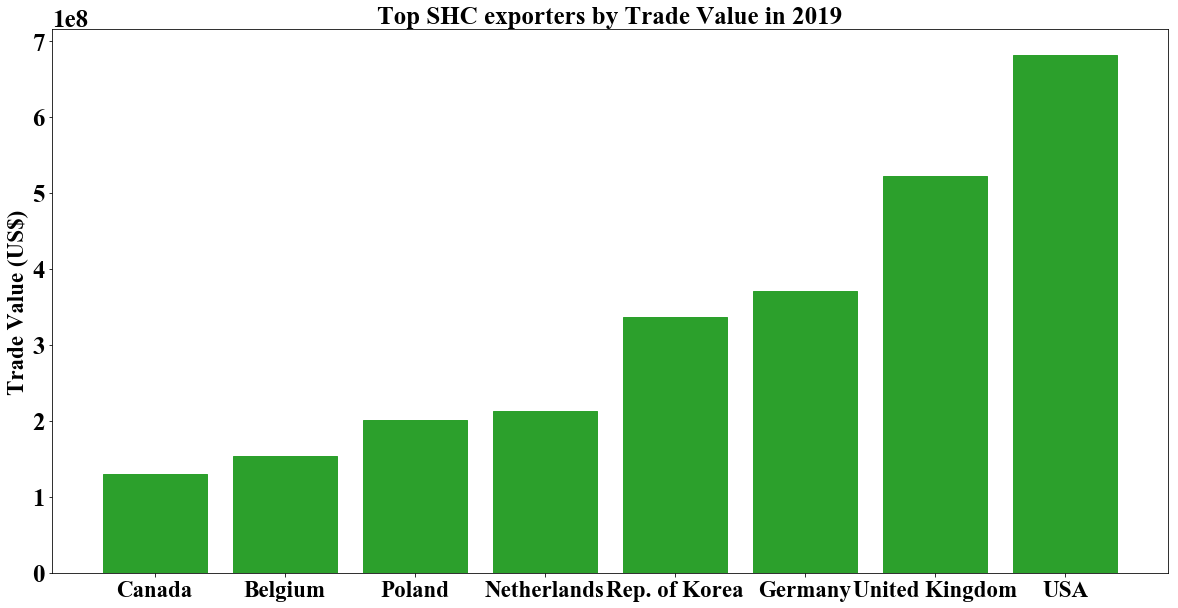

In [27]:
#look at top exporters by $$$

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams["font.family"] = "Times New Roman"

label_size = 23
title_size = 25

top_exports = SHC_small_2019_export_df[SHC_small_2019_export_df['Reporter'].isin(top_exporter_value_2019)].sort_values('Trade Value (US$)')
export_values = top_exports['Trade Value (US$)'].values
export_names = top_exports['Reporter']

plt.figure(figsize=(20,10))
barlist = plt.bar(export_names, export_values);

plt.ylabel('Trade Value (US$)', size=label_size)
plt.title('Top SHC exporters by Trade Value in 2019', size=title_size)

for i, c in enumerate(export_names):
    if c in african_countries:
        barlist[i].set_color('#ff7f0e')
    elif c in western_countries:
        barlist[i].set_color('#2ca02c')
    else:
        barlist[i].set_color('#d62728')
        
plt.savefig('top_exporters_value.png')
plt.show()

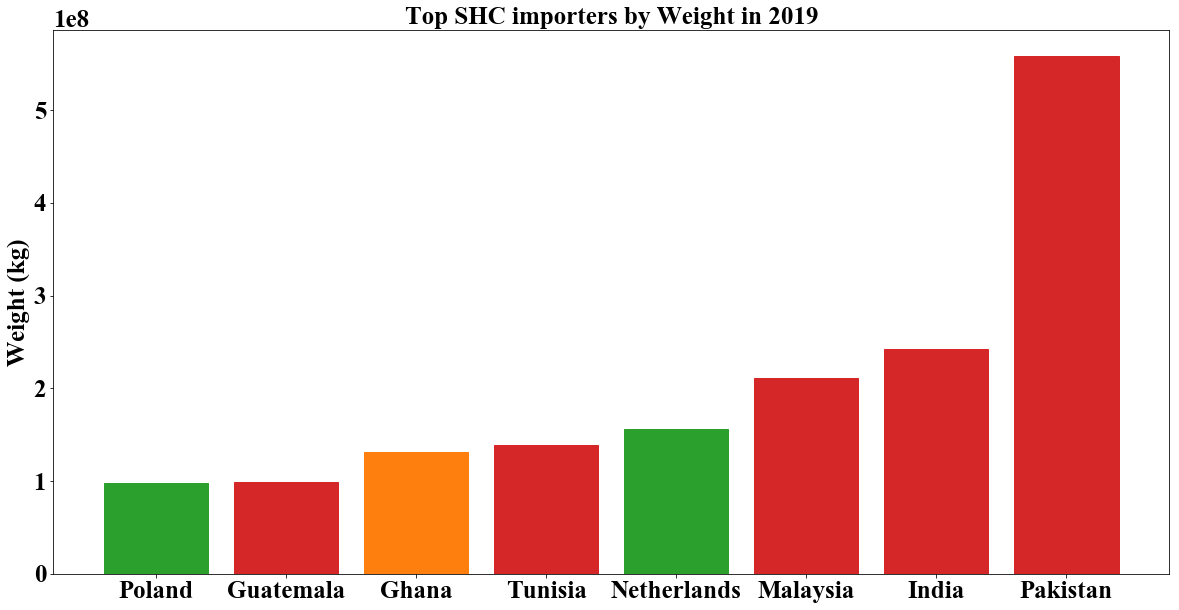

In [24]:
# top importers by weight

top_imports = SHC_small_2019_import_df[SHC_small_2019_import_df['Reporter'].isin(top_importer_weight_2019)].sort_values('Weight (kg)')
import_values = top_imports['Weight (kg)'].values
import_names = top_imports['Reporter']

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams["font.family"] = "Times New Roman"

label_size = 25
title_size = 25

plt.figure(figsize=(20,10))
barlist = plt.bar(import_names, import_values)

plt.ylabel('Weight (kg)', size=label_size)
plt.title('Top SHC importers by Weight in 2019', size=title_size)

for i, c in enumerate(import_names):
    if c in african_countries:
        barlist[i].set_color('#ff7f0e')
    elif c in western_countries:
        barlist[i].set_color('#2ca02c')
    else:
        barlist[i].set_color('#d62728')
        
plt.savefig('top_importers_weight.png')
plt.show()

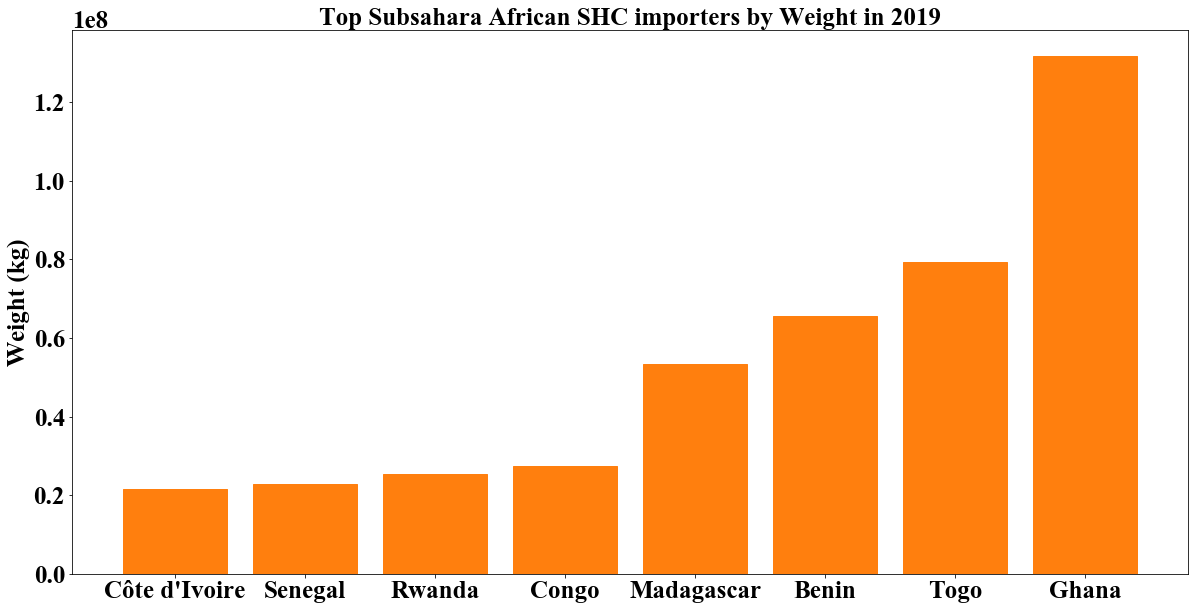

In [25]:
# top african importers by weight

top_imports = SHC_small_2019_import_df[SHC_small_2019_import_df['Reporter'].isin(top_importer_weight_africa_2019)].sort_values('Weight (kg)')
import_values = top_imports['Weight (kg)'].values
import_names = top_imports['Reporter']

plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams["font.family"] = "Times New Roman"

label_size = 25
title_size = 25

plt.figure(figsize=(20,10))
barlist = plt.bar(import_names, import_values)

plt.ylabel('Weight (kg)', size=label_size)
plt.title('Top Subsahara African SHC importers by Weight in 2019', size=title_size)

for i, c in enumerate(import_names):
    if c in african_countries:
        barlist[i].set_color('#ff7f0e')
    elif c in western_countries:
        barlist[i].set_color('#2ca02c')
    else:
        barlist[i].set_color('#d62728')
        
plt.savefig('top_africa_importers_weight.png')        
plt.show();